In [1]:
%load_ext autoreload

%autoreload 2

import sys
sys.path.append("./../..")

In [66]:
%reload_ext yellowbrick
%matplotlib inline
# Imports
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import OneHotEncoder


In [34]:
headers = pd.read_csv("./horse-colic.attrs")
headers.Attribute.values

array(['surgery', 'Age', 'Hospital Number', 'rectal temperature', 'pulse',
       'respiratory rate', 'temperature of extremities',
       'peripheral pulse', 'mucous membranes', 'capillary refill time',
       'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube',
       'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination',
       'abdomen', 'packed cell volume', 'total protein',
       'abdominocentesis appearance', 'abdomcentesis total protein',
       'outcome', 'surgical lesion', 'type of lesion 1',
       'type of lesion 2', 'type of lesion 3', 'cp_data'], dtype=object)

In [69]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'

# Retrieve Data Set
df = pd.read_csv(url, delim_whitespace=True)
df.columns = headers.Attribute.values
df.replace(to_replace="?", value=np.nan, inplace=True,)
df.shape
# matrix = df.as_matrix()

(299, 28)

In [111]:
matrix = df.as_matrix()



In [112]:
matrix

array([['1', 1, 534817, ..., 0, 0, 2],
       ['2', 1, 530334, ..., 0, 0, 1],
       ['1', 9, 5290409, ..., 0, 0, 1],
       ..., 
       ['1', 1, 529386, ..., 0, 0, 2],
       ['1', 1, 530612, ..., 0, 0, 1],
       ['1', 1, 534618, ..., 0, 0, 2]], dtype=object)

In [113]:
# a = np.asarray([[320, True], [400, False], [350, True], [360, True], [340, True], [340, True], [425, False], [380, False], [365, True]])
# print (a)

In [114]:
# matrix[matrix==np.nan] = -999999

In [125]:
nan_matrix = matrix.astype(float)


In [134]:
nan_col_counts = [np.count_nonzero(np.isnan(col)) for col in nan_matrix.T]
nan_col_counts

[1,
 0,
 0,
 60,
 24,
 58,
 56,
 69,
 46,
 32,
 55,
 44,
 56,
 103,
 105,
 246,
 102,
 118,
 29,
 33,
 164,
 197,
 1,
 0,
 0,
 0,
 0,
 0]

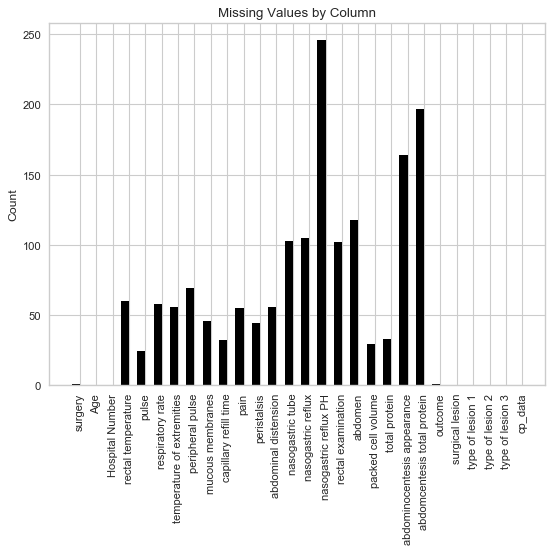

In [148]:
ind = np.arange(len(nan_col_counts))  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6), dpi=80,)
rects1 = ax.bar(ind - width/2, nan_col_counts, width,
                color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Missing Values by Column')
ax.set_xticks(ind)
ax.set_xticklabels(headers.Attribute.values, rotation='vertical')
ax.legend()


plt.show()

In [195]:
# yellowbrick.features.missing
# Feature importance visualizer
#
# Author:  Nathan Danielsen <nathan.danielsen@gmail.com>
# Created: Fri Mar 24 8:17:36 2018 -0500
#
# Copyright (C) 2018 District Data Labs
# For license information, see LICENSE.txt
#
# ID: missing.py [] nathan.danielsen@gmail.com.com $

"""
Implementation of missing values visualizers

To Include:
- Bar
- Density Matrix (by time, specifiable index)
- Heatmap

"""

##########################################################################
## Imports
##########################################################################

import numpy as np
import matplotlib.pyplot as plt

from yellowbrick.utils import is_dataframe
from yellowbrick.utils import is_structured_array
from yellowbrick.features.base import DataVisualizer

# from yellowbrick.style.colors import resolve_colors



##########################################################################
## Feature Visualizer
##########################################################################


class MissingValuesBarVisualizer(DataVisualizer):
    """
    """

    def __init__(self,
                 ax=None,
                 x=None,
                 y=None,
                 features=None,
                 classes=None,
                 color=None,
                 colormap=None,
                 **kwargs):
        """
        """

        super(MissingValuesBarVisualizer, self).__init__(ax, features, classes, color,
                                                colormap, **kwargs)



    def fit(self, X, y=None, **kwargs):
        """
        TODO if y, then color code the missing values in the chart?


        """
        nrows, ncols = df.shape

        # Handle the feature names if they're None.
        if self.features_ is not None and is_dataframe(X):
            X = X[self.features_].as_matrix()

        # handle numpy named/ structured array
        elif self.features_ is not None and is_structured_array(X):
            X_selected = X[self.features_]
            X = X_selected.copy().view((np.float64, len(X_selected.dtype.names)))

        else:
            pass

        if self.features_ is None:
            self.features_ = range(nrows)

        if self.classes_ is None:
            # TODO: Is this the most efficient method?
            self.classes_ = [str(label) for label in np.unique(y)]

        nan_matrix = X.astype(float)
        self.nan_col_counts = [np.count_nonzero(np.isnan(col)) for col in nan_matrix.T]

        # Draw the instances
        self.draw(X, y, **kwargs)

        # Fit always returns self.
        return self

    def draw(self, X, y, **kwargs):
        """Called from the fit method, this method creates a scatter plot that
        draws each instance as a class or target colored point, whose location
        is determined by the feature data set.
        """

        width = 0.5  # the width of the bars

        self.ax.bar(ind - width/2, self.nan_col_counts, width,
                        color='black')

    def finalize(self, **kwargs):
        """
        Finalize executes any subclass-specific axes finalization steps.
        The user calls show and show calls finalize.

        Parameters
        ----------
        kwargs: generic keyword arguments.

        """
        # Set the title
        self.set_title(
            'Missing Values by Column'
        )
        ind = np.arange(len(self.features_))  # the x locations for the groups
        # Remove the ticks from the graph
        self.ax.set_ylabel('Count')
        self.ax.set_xticks(ind)
        self.ax.set_xticklabels(self.features_, rotation='vertical')
        # Add the legend
        self.ax.legend(loc='best')


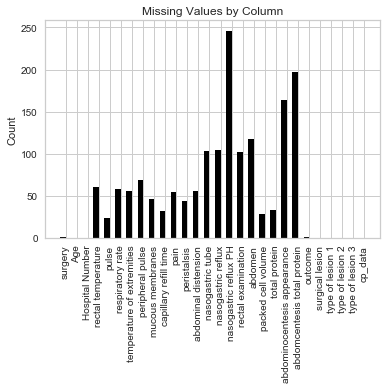

In [196]:
viz = MissingValuesBarVisualizer(features=headers.Attribute.values)
viz.fit(matrix)
viz.show()

In [210]:
matrix
nan_matrix = matrix.astype(float)
nan_matrix[0]

array([  1.00000000e+00,   1.00000000e+00,   5.34817000e+05,
         3.92000000e+01,   8.80000000e+01,   2.00000000e+01,
                    nan,              nan,   4.00000000e+00,
         1.00000000e+00,   3.00000000e+00,   4.00000000e+00,
         2.00000000e+00,              nan,              nan,
                    nan,   4.00000000e+00,   2.00000000e+00,
         5.00000000e+01,   8.50000000e+01,   2.00000000e+00,
         2.00000000e+00,   3.00000000e+00,   2.00000000e+00,
         2.20800000e+03,   0.00000000e+00,   0.00000000e+00,
         2.00000000e+00])

/usr/local/var/pyenv/versions/3.5.2/envs/yb-dev/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


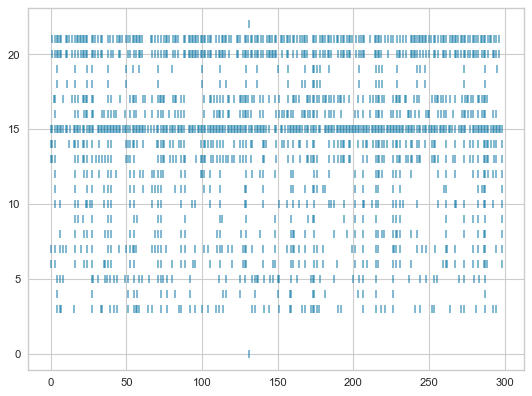

In [271]:
nrows, ncols = matrix.shape







In [290]:
# yellowbrick.features.missing
# Feature importance visualizer
#
# Author:  Nathan Danielsen <nathan.danielsen@gmail.com>
# Created: Fri Mar 24 8:17:36 2018 -0500
#
# Copyright (C) 2018 District Data Labs
# For license information, see LICENSE.txt
#
# ID: missing.py [] nathan.danielsen@gmail.com.com $

"""
Implementation of missing values visualizers

To Include:
- Bar
- Density Matrix (by time, specifiable index)
- Heatmap

"""

##########################################################################
## Imports
##########################################################################

import numpy as np
import matplotlib.pyplot as plt

from yellowbrick.utils import is_dataframe
from yellowbrick.utils import is_structured_array
from yellowbrick.features.base import DataVisualizer

# from yellowbrick.style.colors import resolve_colors



##########################################################################
## Feature Visualizer
##########################################################################


class MissingValueDensity(DataVisualizer):
    """
    """

    def __init__(self,
                 ax=None,
                 x=None,
                 y=None,
                 features=None,
                 classes=None,
                 color=None,
                 colormap=None,
                 **kwargs):
        """
        """

        super(MissingValueDensity, self).__init__(ax, features, classes, color,
                                                colormap, **kwargs)



    def fit(self, X, y=None, **kwargs):
        """
        TODO if y, then color code the missing values in the chart?


        """
        nrows, ncols = df.shape

        # Handle the feature names if they're None.
        if self.features_ is not None and is_dataframe(X):
            X = X[self.features_].as_matrix()

        # handle numpy named/ structured array
        elif self.features_ is not None and is_structured_array(X):
            X_selected = X[self.features_]
            X = X_selected.copy().view((np.float64, len(X_selected.dtype.names)))

        else:
            pass

        if self.features_ is None:
            self.features_ = range(nrows)

        if self.classes_ is None:
            # TODO: Is this the most efficient method?
            self.classes_ = [str(label) for label in np.unique(y)]

        nan_matrix = X.astype(float)
        self.nan_col_counts = [np.count_nonzero(np.isnan(col)) for col in nan_matrix.T]

        self.nan_locs =  np.argwhere(np.isnan(nan_matrix))
        
        # Draw the instances
        self.draw(X, y, **kwargs)

        # Fit always returns self.
        return self

    def draw(self, X, y, **kwargs):
        """Called from the fit method, this method creates a scatter plot that
        draws each instance as a class or target colored point, whose location
        is determined by the feature data set.
        """

        width = 0.5  # the width of the bars

        x, y = list(zip(*self.nan_locs))

        self.ax.scatter(x, y, alpha=0.5, marker="|")

    def finalize(self, **kwargs):
        """
        Finalize executes any subclass-specific axes finalization steps.
        The user calls show and show calls finalize.

        Parameters
        ----------
        kwargs: generic keyword arguments.

        """
        # Set the title
        self.set_title(
            'Dispersion of Missing Values by Feature'
        )
        ind = np.arange(len(self.features_))  # the x locations for the groups
        # Remove the ticks from the graph
        self.ax.set_xlabel('Count')
        self.ax.set_yticks(ind)
        self.ax.set_yticklabels(self.features_)
        # Add the legend
        self.ax.legend(loc='best')


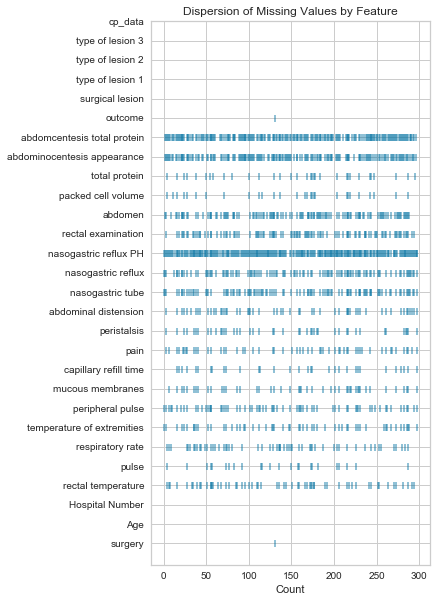

In [291]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

viz = MissingValueDensity(features=headers.Attribute.values)
viz.fit(matrix)
viz.show()